In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Load the data
df = pd.read_csv('east_texas_reservoir.csv')
# set date as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df

,reservoir_storage,conservation_storage,percent_full,conservation_capacity
date,,,,
1951-05-02,36370,36370,38.6,94250
1951-05-03,44540,44540,47.3,94250
1951-05-04,57400,57400,60.9,94250
1951-05-05,67400,67400,71.5,94250
1951-05-06,73250,73250,77.7,94250
...,...,...,...,...
2024-04-17,12644745,9559409,94.9,10074732
2024-04-18,12611447,9592145,95.2,10074732
2024-04-19,12595460,9620645,95.5,10074732


# Data Analysis

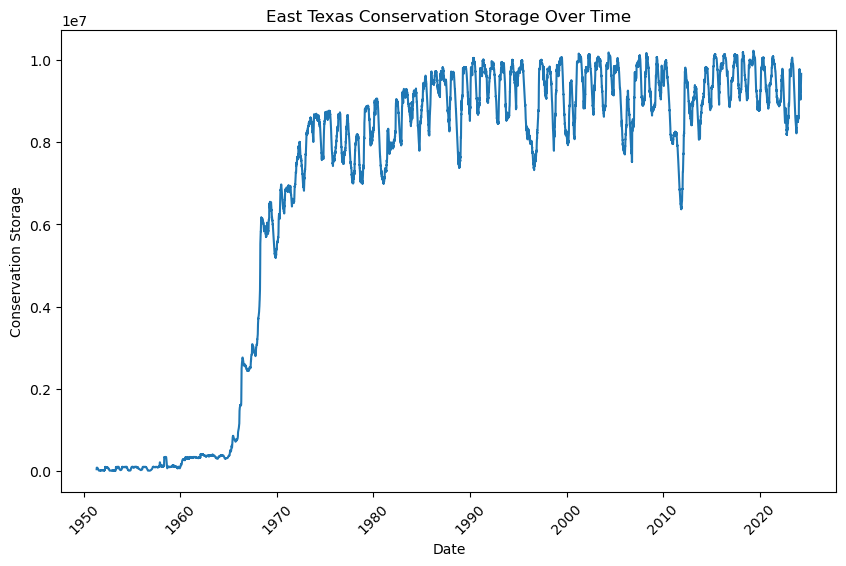

In [35]:
# Plot the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='conservation_storage', data=df)
plt.title('East Texas Conservation Storage Over Time')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.xticks(rotation=45)
plt.show()

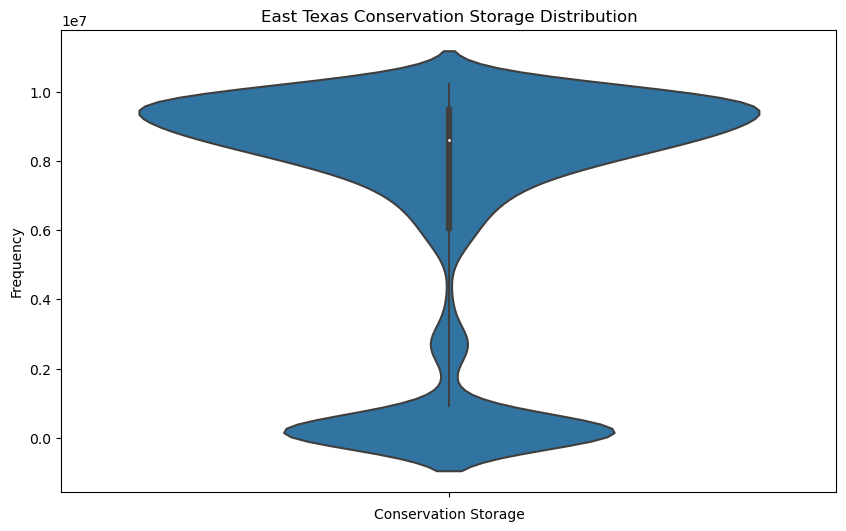

In [36]:
# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(y='conservation_storage', data=df)
plt.title('East Texas Conservation Storage Distribution')
plt.xlabel('Conservation Storage')
plt.ylabel('Frequency')
plt.show()

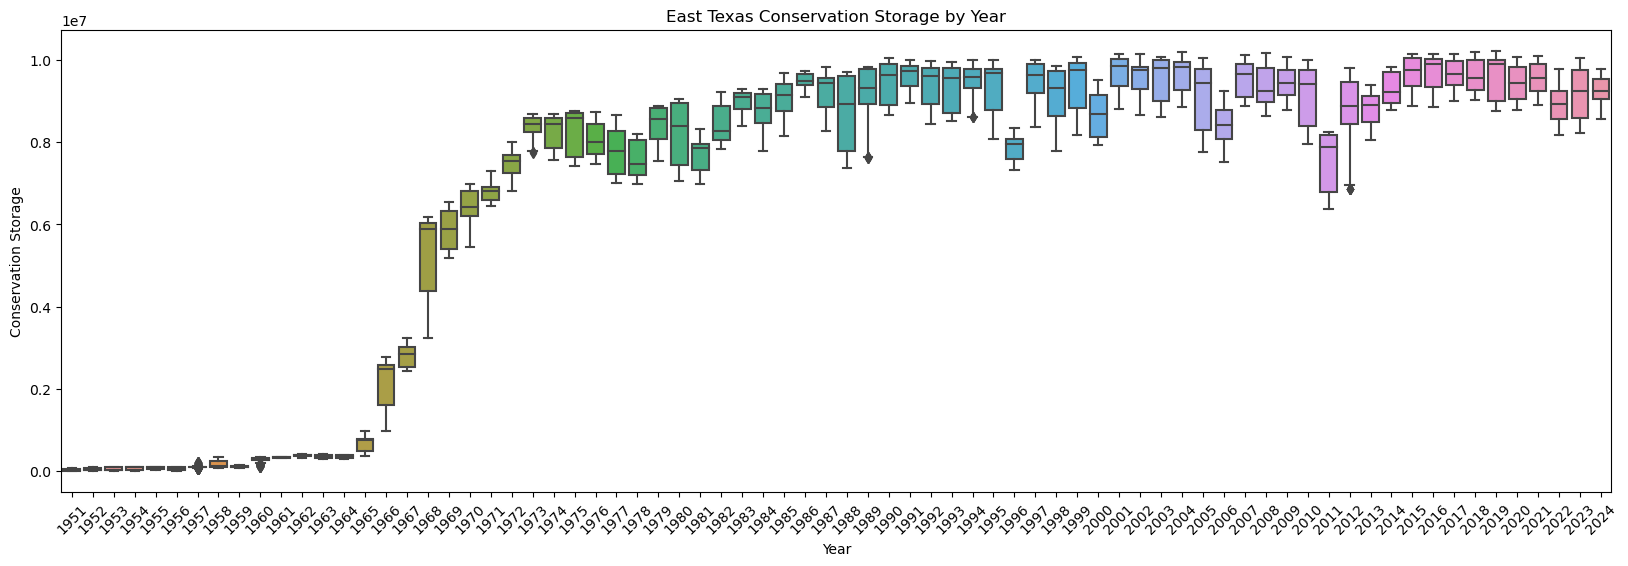

In [37]:
# box plot yearly
yearly_df = df.copy()
yearly_df['year'] = yearly_df.index.year
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='conservation_storage', data=yearly_df)
plt.title('East Texas Conservation Storage by Year')
plt.xlabel('Year')
plt.ylabel('Conservation Storage')
plt.xticks(rotation=45)
plt.show()

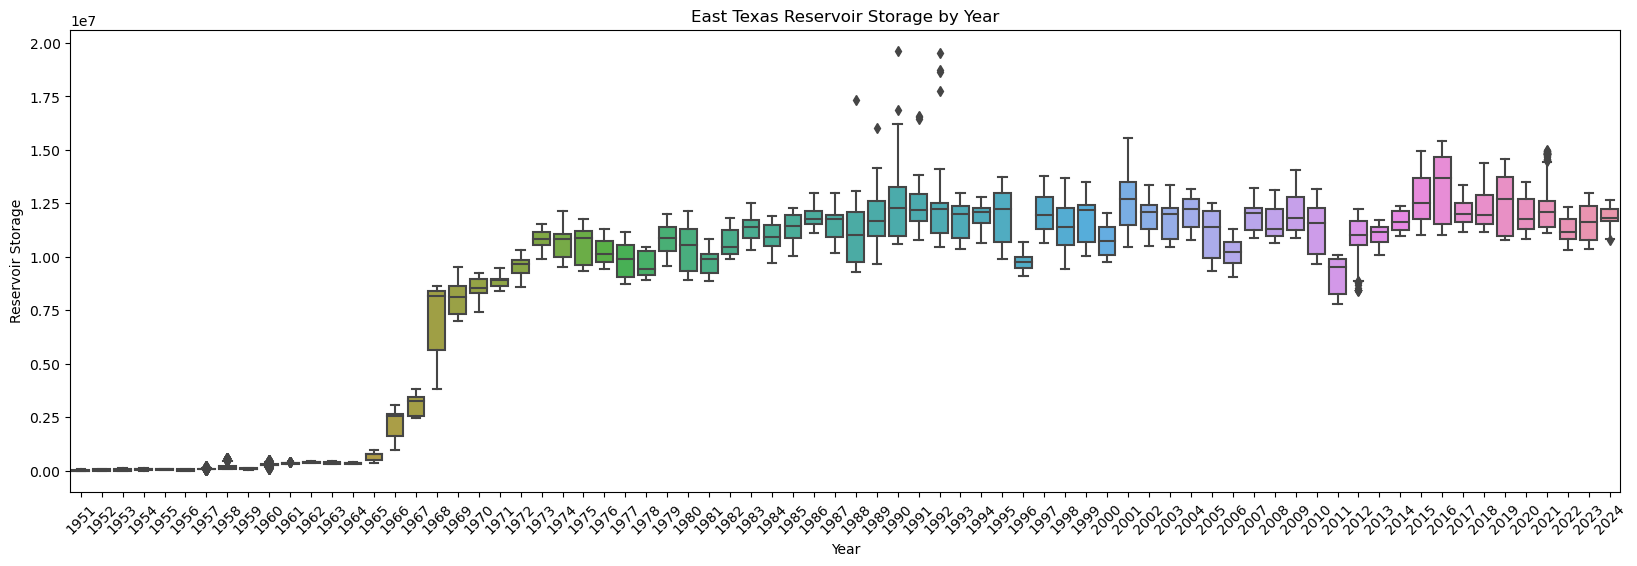

In [38]:
# box plot yearly
yearly_df = df.copy()
yearly_df['year'] = yearly_df.index.year
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='reservoir_storage', data=yearly_df)
plt.title('East Texas Reservoir Storage by Year')
plt.xlabel('Year')
plt.ylabel('Reservoir Storage')
plt.xticks(rotation=45)
plt.show()

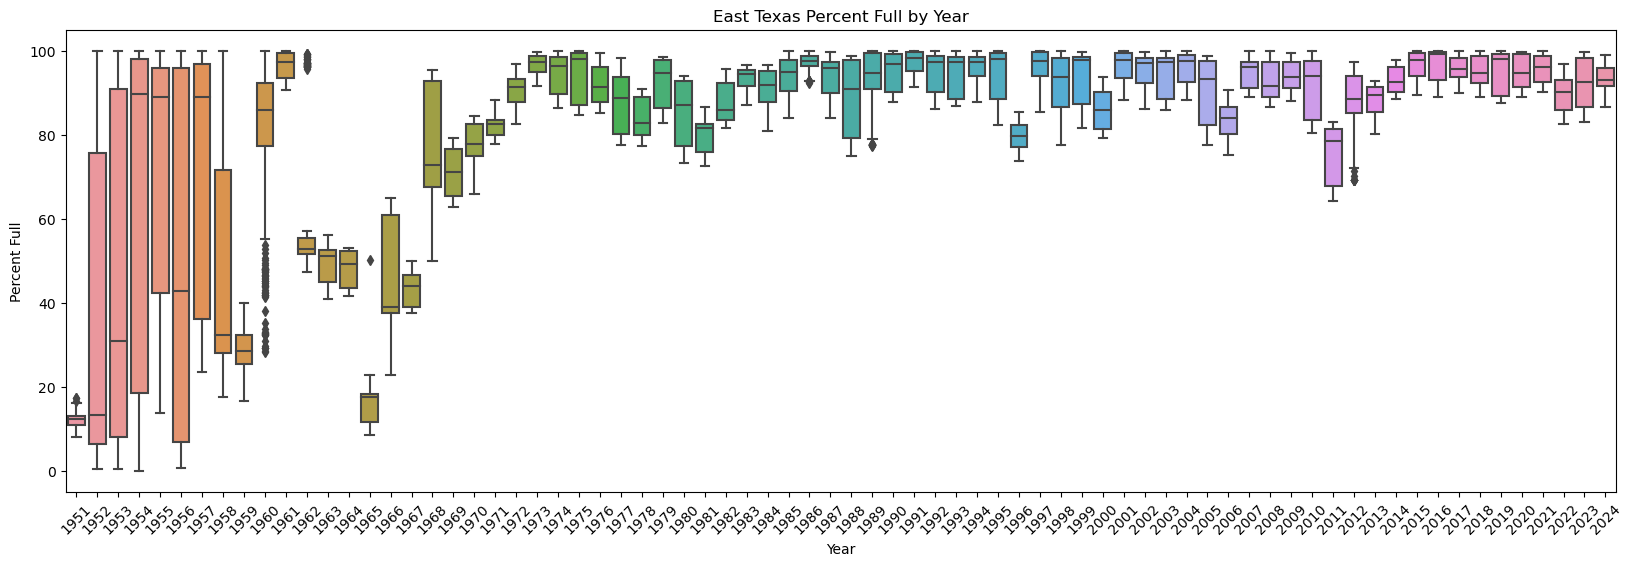

In [52]:
# box plot yearly
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='percent_full', data=yearly_df)
plt.title('East Texas Percent Full by Year')
plt.xlabel('Year')
plt.ylabel('Percent Full')
plt.xticks(rotation=45)
plt.show()

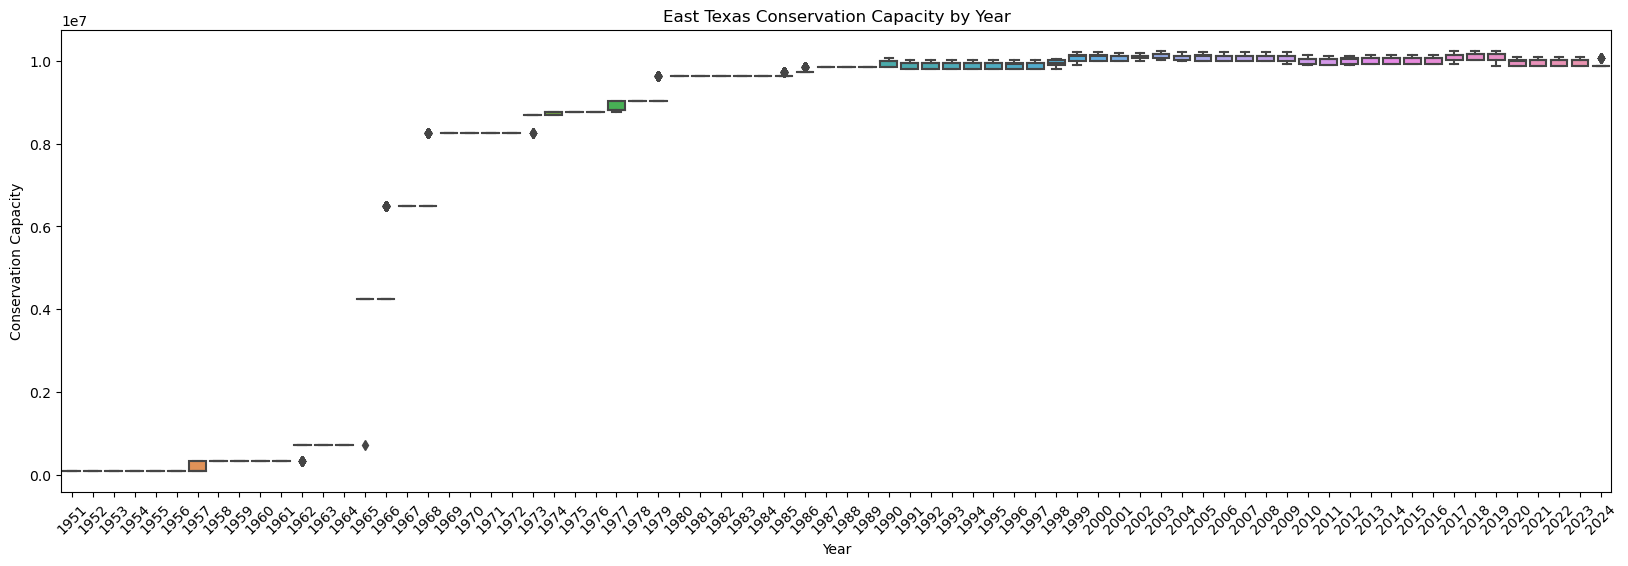

In [53]:
# box plot yearly
plt.figure(figsize=(20, 6))
sns.boxplot(x='year', y='conservation_capacity', data=yearly_df)
plt.title('East Texas Conservation Capacity by Year')
plt.xlabel('Year')
plt.ylabel('Conservation Capacity')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

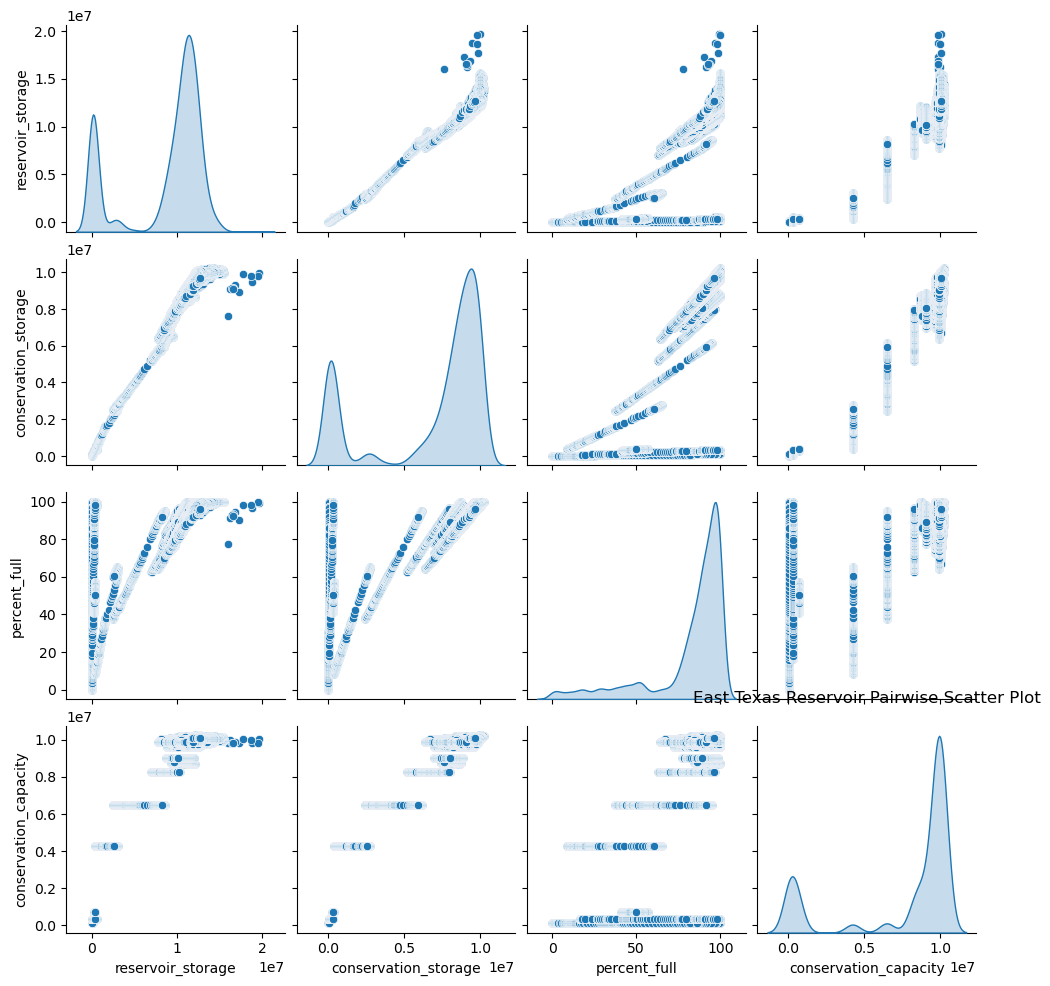

In [39]:
# pairwise scatter plot
plt.figure(figsize=(10, 6))
sns.pairplot(df, diag_kind='kde')
plt.title('East Texas Reservoir Pairwise Scatter Plot')
plt.show()

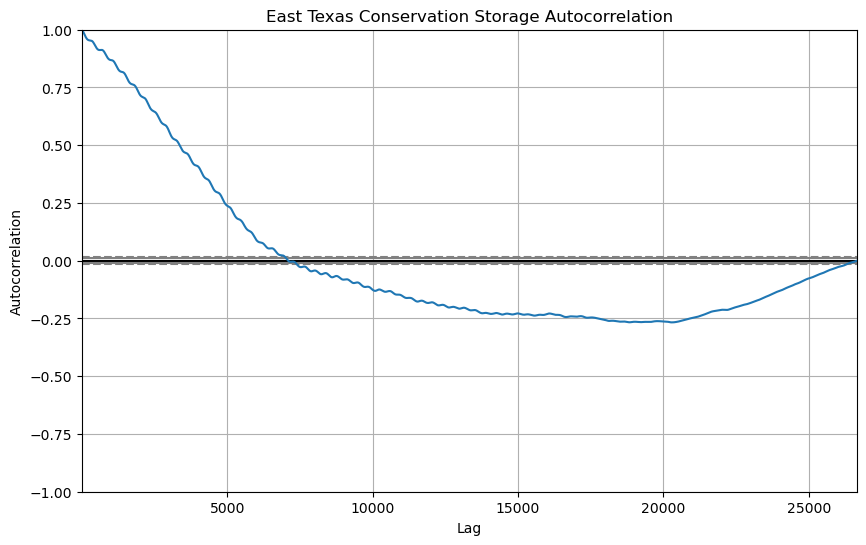

In [40]:
# autocorrelation plot
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(df['conservation_storage'])
plt.title('East Texas Conservation Storage Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

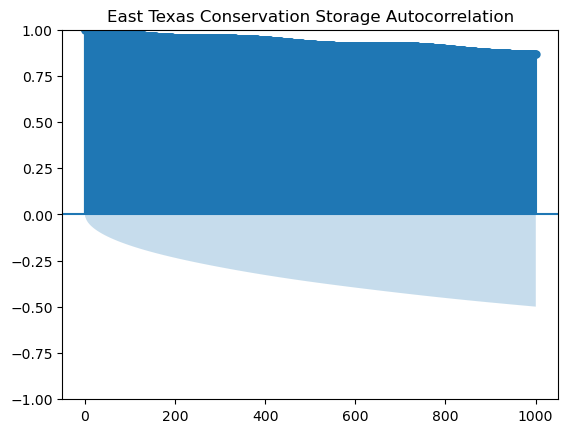

In [41]:
# acf plot
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10, 6))
plot_acf(df['conservation_storage'], lags=1000)
plt.title('East Texas Conservation Storage Autocorrelation')
plt.show()

<Figure size 1000x600 with 0 Axes>

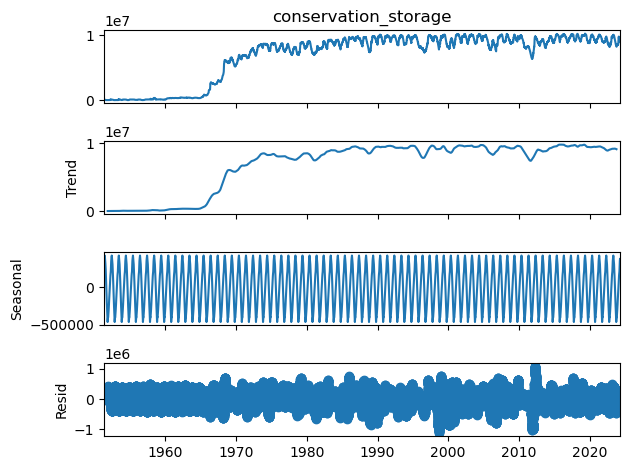

In [42]:
# seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['conservation_storage'], period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

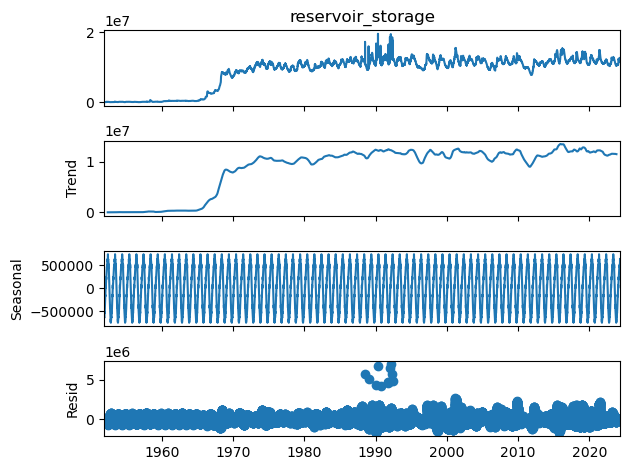

In [55]:
# seasonal decomposition for reservoir storage
decomposition = seasonal_decompose(df['reservoir_storage'], period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

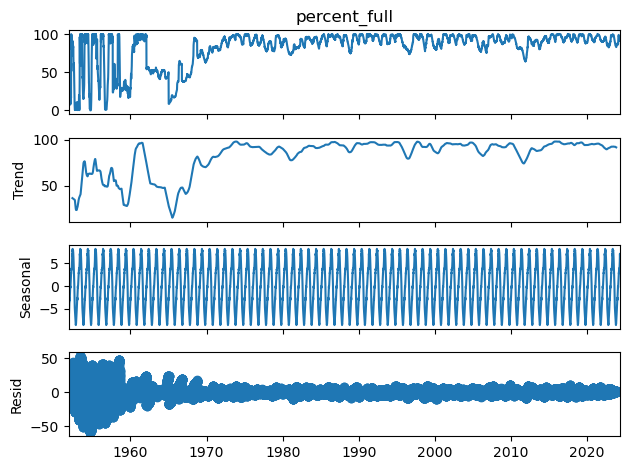

In [56]:
# seasonal decomposition for percent full
decomposition = seasonal_decompose(df['percent_full'], period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

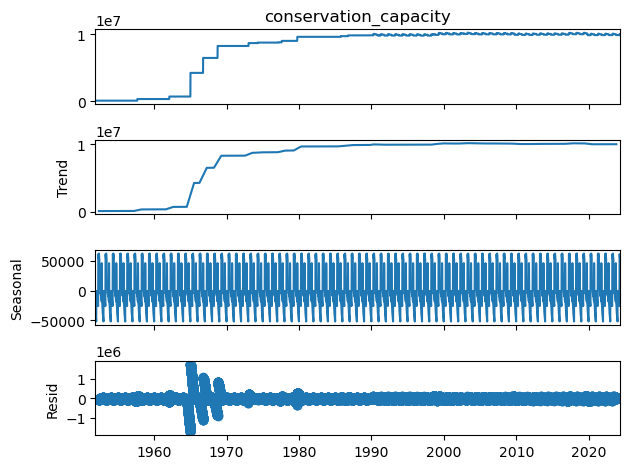

In [57]:
# seasonal decomposition for conservation capacity
decomposition = seasonal_decompose(df['conservation_capacity'], period=365)
plt.figure(figsize=(10, 6))
decomposition.plot()
plt.show()

# Prediction Model

In [ ]:
# create 50 columns for each lag
for i in range(1, 200):
    df[f'conservation_storage_{i}'] = df['conservation_storage'].shift(i)

# drop rows with NaN values
df.dropna(inplace=True)

In [44]:
df

,reservoir_storage,conservation_storage,percent_full,conservation_capacity,conservation_storage_1,conservation_storage_2,conservation_storage_3,conservation_storage_4,conservation_storage_5,conservation_storage_6,...,conservation_storage_190,conservation_storage_191,conservation_storage_192,conservation_storage_193,conservation_storage_194,conservation_storage_195,conservation_storage_196,conservation_storage_197,conservation_storage_198,conservation_storage_199
date,,,,,,,,,,,,,,,,,,,,,
1951-11-17,7600,7600,8.1,94250,7440.0,7350.0,7210.0,7030.0,6700.0,6420.0,...,72340.0,71890.0,71330.0,72000.0,73130.0,73250.0,67400.0,57400.0,44540.0,36370.0
1951-11-18,7960,7960,8.4,94250,7600.0,7440.0,7350.0,7210.0,7030.0,6700.0,...,74040.0,72340.0,71890.0,71330.0,72000.0,73130.0,73250.0,67400.0,57400.0,44540.0
1951-11-19,8200,8200,8.7,94250,7960.0,7600.0,7440.0,7350.0,7210.0,7030.0,...,74730.0,74040.0,72340.0,71890.0,71330.0,72000.0,73130.0,73250.0,67400.0,57400.0
1951-11-20,8540,8540,9.1,94250,8200.0,7960.0,7600.0,7440.0,7350.0,7210.0,...,75540.0,74730.0,74040.0,72340.0,71890.0,71330.0,72000.0,73130.0,73250.0,67400.0
1951-11-21,8800,8800,9.3,94250,8540.0,8200.0,7960.0,7600.0,7440.0,7350.0,...,76010.0,75540.0,74730.0,74040.0,72340.0,71890.0,71330.0,72000.0,73130.0,73250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-17,12644745,9559409,94.9,10074732,9527982.0,9507443.0,9495681.0,9482812.0,9467074.0,9447737.0,...,8356268.0,8363032.0,8378467.0,8402407.0,8406589.0,8390226.0,8421202.0,8423480.0,8438654.0,8453732.0
2024-04-18,12611447,9592145,95.2,10074732,9559409.0,9527982.0,9507443.0,9495681.0,9482812.0,9467074.0,...,8356958.0,8356268.0,8363032.0,8378467.0,8402407.0,8406589.0,8390226.0,8421202.0,8423480.0,8438654.0
2024-04-19,12595460,9620645,95.5,10074732,9592145.0,9559409.0,9527982.0,9507443.0,9495681.0,9482812.0,...,8351077.0,8356958.0,8356268.0,8363032.0,8378467.0,8402407.0,8406589.0,8390226.0,8421202.0,8423480.0


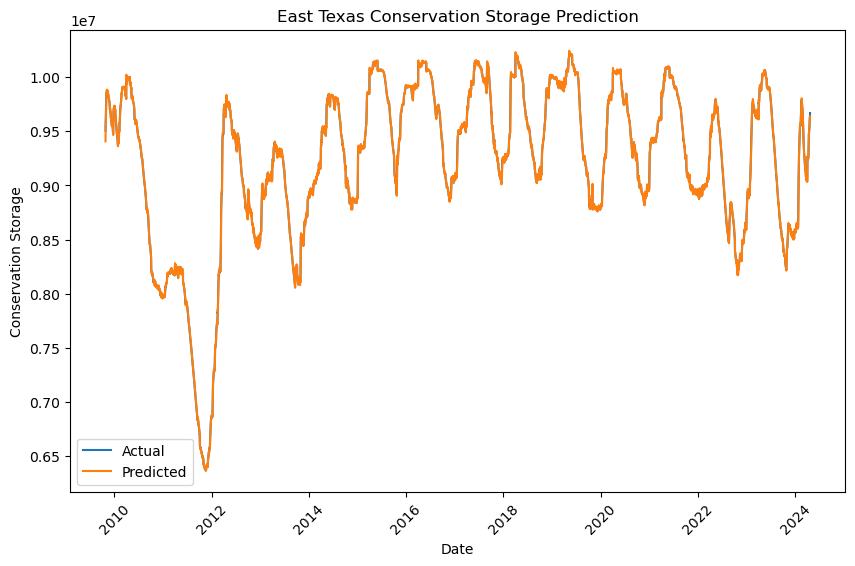

In [45]:
# create X and y, with X being the lag columns and y being the target column
X = df.drop(['conservation_storage', 'percent_full', 'conservation_capacity', 'reservoir_storage'], axis=1)
y = df['conservation_storage']

# split the data into training and testing sets and remain the time order
split_index = int(0.8 * len(df))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('East Texas Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [46]:
# print mse, rmse, and r2
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# print mae
mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2: {r2}')

Mean Absolute Error: 11242.873355183467
Mean Squared Error: 389010178.60889804
Root Mean Squared Error: 19723.340959606667
R^2: 0.9993003969192304


In [47]:
# display a dataframe with the actual and predicted values
df_pred = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
df_pred

,actual,predicted
date,,
2009-10-27,9504886,9.406341e+06
2009-10-28,9564514,9.539924e+06
2009-10-29,9577790,9.592241e+06
2009-10-30,9645050,9.599725e+06
2009-10-31,9735142,9.679669e+06
...,...,...
2024-04-17,9559409,9.546262e+06
2024-04-18,9592145,9.570264e+06
2024-04-19,9620645,9.611248e+06


In [48]:
# # train a random forest model
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor()
# model.fit(X_train, y_train)

# # make predictions
# y_pred = model.predict(X_test)

# # plot the predictions
# plt.figure(figsize=(10, 6))
# plt.plot(y_test.index, y_test, label='Actual')

# plt.plot(y_test.index, y_pred, label='Predicted')
# plt.title('East Texas Conservation Storage Prediction')
# plt.xlabel('Date')
# plt.ylabel('Conservation Storage')
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

In [49]:
# # print mse, rmse, and r2
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# # print mae
# mae = np.mean(np.abs(y_test - y_pred))
# print(f'Mean Absolute Error: {mae}')
# print(f'Mean Squared Error: {mse}')
# print(f'Root Mean Squared Error: {rmse}')
# print(f'R^2: {r2}')


Epoch 1/1000


C:\Users\nhkho\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


530/530 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 46767961800704.0000 - val_loss: 86715783970816.0000
Epoch 2/1000
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47083729977344.0000 - val_loss: 86589787078656.0000
Epoch 3/1000
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46867031261184.0000 - val_loss: 86395758575616.0000
Epoch 4/1000
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46840112218112.0000 - val_loss: 86143185977344.0000
Epoch 5/1000
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46240481935360.0000 - val_loss: 85839493201920.0000
Epoch 6/1000
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46653713154048.0000 - val_loss: 85490711658496.0000
Epoch 7/1000
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46556556296192.0000 - val_loss: 85099156602880.0000
Epoch 8/1000
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 46438033653760.0000 - val_loss: 84667940208640.0000
Epoch 9/1000
530/530 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45831050756096.0000 - val_loss: 8419800

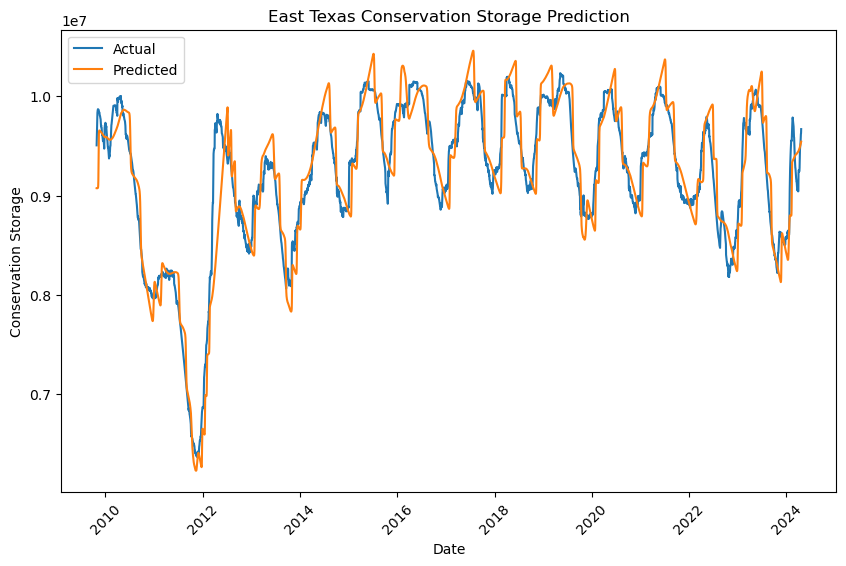

Mean Squared Error: 69838774481.85248
Root Mean Squared Error: 264270.2678733506
R^2: 0.8744006597477789


In [50]:
# train with LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# reshape the data
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# create the model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
model.add(Dense(1))
model.add(Flatten())
model.compile(optimizer='adam', loss='mse')

# early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# train the model
model.fit(X_train_reshaped, y_train, epochs=1000, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# make predictions
y_pred = model.predict(X_test_reshaped)

# plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('East Texas Conservation Storage Prediction')
plt.xlabel('Date')
plt.ylabel('Conservation Storage')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# print mse, rmse, and r2
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# print mae
# mae = np.mean(np.abs(y_test - y_pred))
# print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2: {r2}')